In [3]:
# Analyse van +5000 IMDB geregistreerde films voor data mining

# dataset gedownload van https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset
# 5043 films met elk 26 variabelen :
# 0: color, 1: director_name, 2: num_critic_for_reviews, 3: duration, 4: director_facebook_likes, 5: actor_3_facebook_likes, 
# 6: actor_2_name, 7: actor_1_facebook_likes, 8: gross, 9: genres, 10: actor_1_name, 11: movie_title, 12: num_voted_users, 
# 13: cast_total_facebook_likes, 14: actor_3_name, 15: facenumber_in_poster, 16: plot_keywords, 17: movie_imdb_link, 
# 18: num_user_for_reviews, 19: language, 20: country, 21: content_rating, 22: budget, 23: title_year,
# 24: actor_2_facebook_likes, 25: imdb_score, 26: aspect_ratio, 27: movie_facebook_likes
# niet correct meer ! ^^^^^^^^^
# movie_title, imdb_score , genres, country, plot_keywords, director_name, budget
# gross, profit, roi

from pyspark.sql import SQLContext
from pyspark.sql.types import *
from collections import Counter
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


raw_movie_data = sc.textFile('./movie_metadata.csv')
movie_count = raw_movie_data.count()
print movie_count
header = raw_movie_data.first() #extract header
raw_movie_data = raw_movie_data.filter(lambda x: x != header)
keywords = header.split(',')
movie_data = raw_movie_data.map(lambda x: x.split(","))

def add_columns(line):
    try:
        profit = float(line[7]) - float(line[6])
        roi = profit / float(line[7])
    except:
        profit = 'nope'
        roi = 'nope'
    line.append(profit)
    line.append(roi)
    return line

optimized_rdd = movie_data.map(lambda x: [x[11],x[25],x[9],x[20],x[16],x[1],x[22],x[8]])
# movie title, imdb_score , genres, country, plot_keywords, director_name, budget
# gross, profit, roi
new_rdd = optimized_rdd.map(add_columns)
new_rdd = new_rdd.filter(lambda x: x[8] is not 'nope')

5044


In [6]:
header = raw_movie_data.first() #extract header
raw_movie_data = raw_movie_data.filter(lambda x: x != header)
keywords = header.split(',')

[u'color', u'director_name', u'num_critic_for_reviews', u'duration', u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name', u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name', u'movie_title', u'num_voted_users', u'cast_total_facebook_likes', u'actor_3_name', u'facenumber_in_poster', u'plot_keywords', u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country', u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes', u'imdb_score', u'aspect_ratio', u'movie_facebook_likes']


In [46]:
#raw_movie_data = raw_movie_data.filter(lambda l: ',,' not in l)
movie_data = raw_movie_data.map(lambda x: x.split(","))
                    
genre_data = movie_data.map(lambda x: x[9])
genre_data = genre_data.map(lambda x: x.split('|'))
counter_genres_json = genre_data.map(Counter).reduce(lambda x, y: x + y)

Counter({u'Drama': 1894, u'Comedy': 1461, u'Thriller': 1117, u'Action': 959, u'Romance': 859, u'Adventure': 781, u'Crime': 709, u'Fantasy': 507, u'Sci-Fi': 496, u'Family': 442, u'Horror': 392, u'Mystery': 384, u'Biography': 239, u'Animation': 196, u'War': 152, u'Music': 151, u'History': 150, u'Sport': 148, u'Musical': 96, u'Western': 59, u'Documentary': 45, u'Film-Noir': 1})


In [47]:
c = counter_genres_json.most_common()
genres = []
g_amount = []
for a, b in c:
    genres.append(str(a))
    g_amount.append(b)

print(genres)

['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Adventure', 'Crime', 'Fantasy', 'Sci-Fi', 'Family', 'Horror', 'Mystery', 'Biography', 'Animation', 'War', 'Music', 'History', 'Sport', 'Musical', 'Western', 'Documentary', 'Film-Noir']


In [48]:
print(g_amount)

[1894, 1461, 1117, 959, 859, 781, 709, 507, 496, 442, 392, 384, 239, 196, 152, 151, 150, 148, 96, 59, 45, 1]


In [49]:
for i, a in enumerate(g_amount):
    a = float(a) / float(movie_count)
    g_amount[i] = a * 100
    
print(g_amount)

[37.549563838223634, 28.965107057890567, 22.145122918318794, 19.01268834258525, 17.030134813639968, 15.483743061062649, 14.056304520222046, 10.051546391752577, 9.833465503568597, 8.762886597938143, 7.7716098334655035, 7.613005551149881, 4.738302934179223, 3.8858049167327517, 3.013481363996828, 2.993655828707375, 2.973830293417922, 2.9341792228390164, 1.9032513877874702, 1.1697065820777162, 0.8921490880253766, 0.019825535289452814]


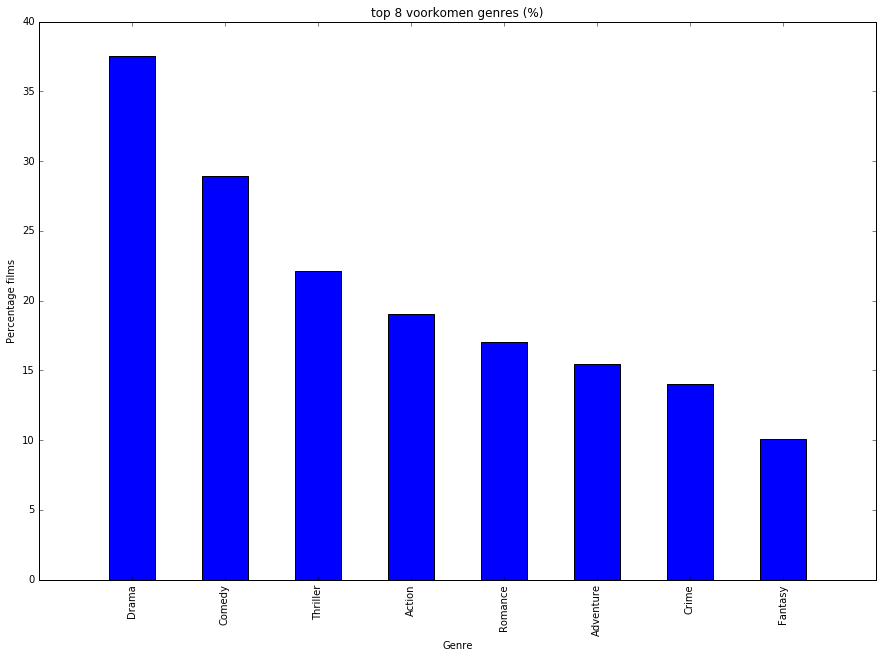

In [50]:
#fig = plt.figure(figsize=(15, 7))
#fig.suptitle('% occurence of genres in top 5000', fontsize=14, fontweight='bold')
#ax1 = fig.add_subplot(121)
#ax1.pie(g_amount[:10],explode=None,labels=genres,autopct='%1.2f%%',shadow=True, startangle=900)

#plt.show()

#pass
y = g_amount[:8]
x = np.arange(8)
labels = genres[:8]

fig = plt.figure(figsize=(15, 10))
plt.title("top 8 voorkomen genres (%)")
plt.bar(x,y,width=0.5,color="blue",align="center")
plt.xticks(x , labels, rotation=90, fontsize=10)
plt.ylabel("Percentage films")
plt.xlabel("Genre")
#ticks = plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

pass

In [51]:
#imdb_genre = movie_data.sortBy(lambda x: x[25], ascending = False)
#imdb_genre = imdb_genre.filter(lambda x: float(x[25]) <= 10.0)
#imdb_genre = imdb_genre.map(lambda x: x[9])
imdb_genre = movie_data.map(lambda x: float(x[25])).filter(lambda x: x[25] <= 10.0)

genre_data = movie_data.map(lambda x: x[9])
genre_data = genre_data.map(lambda x: x.split('|'))
counter_genres = genre_data.map(Counter).reduce(lambda x, y: x + y)
print(counter_genres)

#imdb_genre = imdb_genre.top(100, key=lambda x: x[25])

Counter({u'Drama': 1894, u'Comedy': 1461, u'Thriller': 1117, u'Action': 959, u'Romance': 859, u'Adventure': 781, u'Crime': 709, u'Fantasy': 507, u'Sci-Fi': 496, u'Family': 442, u'Horror': 392, u'Mystery': 384, u'Biography': 239, u'Animation': 196, u'War': 152, u'Music': 151, u'History': 150, u'Sport': 148, u'Musical': 96, u'Western': 59, u'Documentary': 45, u'Film-Noir': 1})


In [52]:
#director_data = movie_data.map(lambda x: x[1])
#director_data.take(5)
#counter_director_data = director_data.map(Counter).reduce(lambda x, y: x + y)
#print(counter_director_data)

director_data = movie_data.map(lambda x: x[1])
director_data = director_data.map(lambda x: x.split('|'))
counter_directors_json = director_data.map(Counter).reduce(lambda x, y: x + y)
print(counter_directors_json)

Counter({u'Steven Spielberg': 25, u'Woody Allen': 19, u'Clint Eastwood': 19, u'Ridley Scott': 17, u'Martin Scorsese': 16, u'Tim Burton': 16, u'Steven Soderbergh': 16, u'Renny Harlin': 15, u'Spike Lee': 15, u'Robert Rodriguez': 13, u'Robert Zemeckis': 13, u'Michael Bay': 13, u'Oliver Stone': 13, u'John Carpenter': 13, u'Barry Levinson': 13, u'Ron Howard': 13, u'Sam Raimi': 12, u'Shawn Levy': 12, u'Wes Craven': 12, u'Tony Scott': 12, u'Joel Schumacher': 12, u'Chris Columbus': 11, u'Rob Reiner': 11, u'Richard Linklater': 11, u'Rob Cohen': 11, u'Peter Jackson': 11, u'Kevin Smith': 10, u'Brett Ratner': 10, u'John McTiernan': 10, u'David Fincher': 10, u'Brian De Palma': 10, u'Paul W.S. Anderson': 10, u'Danny Boyle': 9, u'Bobby Farrelly': 9, u'Richard Donner': 9, u'Francis Ford Coppola': 9, u'Phillip Noyce': 9, u'Stephen Frears': 9, u'Martin Campbell': 9, u'Dennis Dugan': 9, u'Donald Petrie': 8, u'Quentin Tarantino': 8, u'Frank Oz': 8, u'Christopher Nolan': 8, u'Ivan Reitman': 8, u'F. Gary Gr

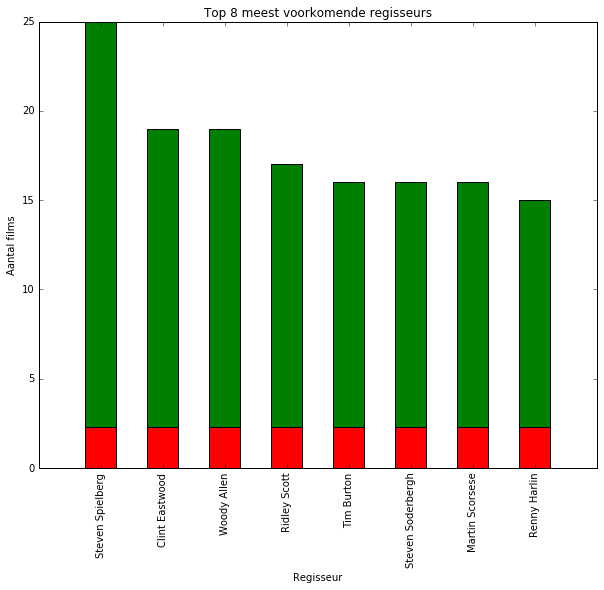

In [13]:
csv_data = sc.textFile('./movie_metadata.csv').map(lambda x: x.split(","))
directors = csv_data.filter(lambda x: 'director_name' not in x).filter(lambda x: '' not in x)
directors = directors.map(lambda x:(x[1], 1))
#values optellen
directors = directors.reduceByKey(lambda x, y : x + y)
#omgekeerd om te kunnen sorten
directors_value = directors.map(lambda x:(x[1], x[0]))
directors_value = directors_value.sortByKey(False)
directors_values = directors_value.map(lambda x: x[0])
directors_names = directors_value.map(lambda x: x[1])

#def chartArrays(line):
#    arrayX.append(line[1])
#    arrayY.append(line[0])
#    return line

array_x = [x for x in directors_names.toLocalIterator()]
array_y = [x for x in directors_values.toLocalIterator()]

y = array_y[:8]
x = np.arange(len(y))
labels = array_x[:8]

threshold = np.mean(array_y) #=2,26

# opsplitsen boven en onder gemiddelde
above_threshold = np.maximum(y - threshold, 0)
below_threshold = np.minimum(y, threshold)


fig = plt.figure(figsize=(10, 8))
plt.title("Top 8 meest voorkomende regisseurs")
plt.bar(x, below_threshold, width=0.5, color="red", align="center")
plt.bar(x, above_threshold, width=0.5, color="green", bottom=below_threshold, align="center")
plt.xticks(x , labels, rotation=90, fontsize=10)
plt.ylabel("Aantal films")
plt.xlabel("Regisseur")
plt.show()

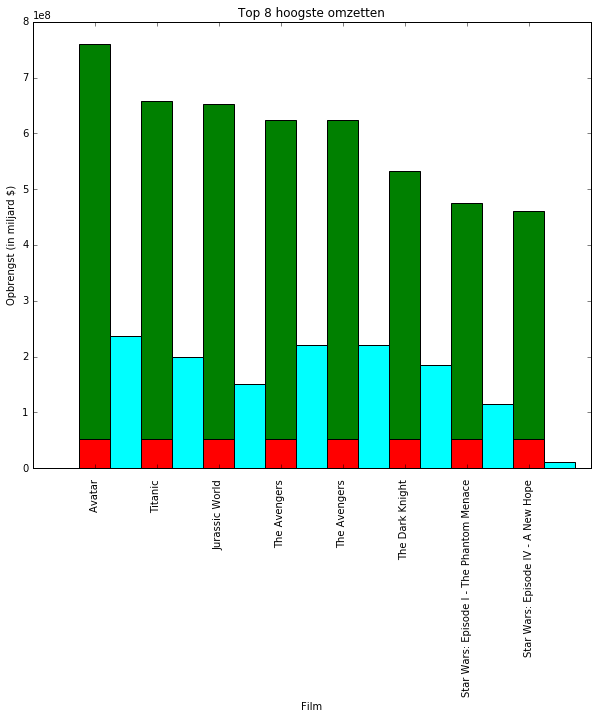

In [25]:
gross = new_rdd.filter(lambda x: '' not in x)
grossa = gross.map(lambda x:(float(x[7]), x[0])).sortByKey(False)

gross_values = grossa.map(lambda x: x[0])
gross_names = grossa.map(lambda x: x[1])
array_x = [x for x in gross_names.toLocalIterator()]
array_y = [x for x in gross_values.toLocalIterator()]

grossb = gross.map(lambda x:(float(x[7]), x[6])).sortByKey(False)
gross_budget = grossb.map(lambda x: x[1])
array_budget = [x for x in gross_budget.toLocalIterator()]

y = array_y[:8]
y2 = array_budget[:8]
x = np.arange(len(y))
labels = array_x[:8]

threshold = np.mean(array_y) 

# opsplitsen boven en onder gemiddelde
above_threshold = np.maximum(y - threshold, 0)
below_threshold = np.minimum(y, threshold)

fig = plt.figure(figsize=(10, 8))
plt.title("Top 8 hoogste omzetten")
plt.bar(x, below_threshold, width=0.5, color="red", align="center")
plt.bar(x, above_threshold, width=0.5, color="green", bottom=below_threshold, align="center")
plt.bar(x + 0.5, y2, width=0.5, color="cyan", align="center" )
plt.xticks(x , labels, rotation=90, fontsize=10)
plt.ylabel("Opbrengst (in miljard $)")
plt.xlabel("Film")
plt.show()

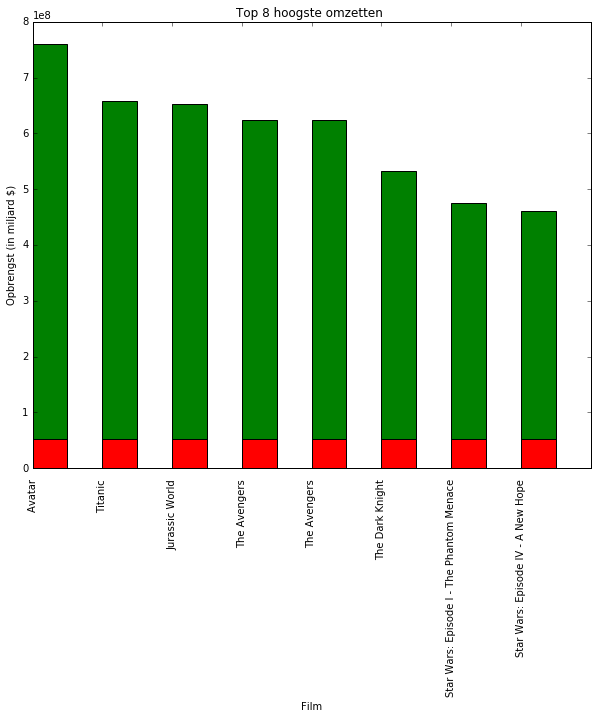

In [22]:
gross= new_rdd.filter(lambda x: '' not in x)
gross = gross.map(lambda x:(float(x[7]), x[0]))
gross = gross.sortByKey(False)

gross_values = gross.map(lambda x: x[0])
gross_names = gross.map(lambda x: x[1])

array_x = [x for x in gross_names.toLocalIterator()]
array_y = [x for x in gross_values.toLocalIterator()]

y = array_y[:8]
x = np.arange(len(y))
labels = array_x[:8]

threshold = np.mean(array_y) 

# opsplitsen boven en onder gemiddelde
above_threshold = np.maximum(y - threshold, 0)
below_threshold = np.minimum(y, threshold)


fig = plt.figure(figsize=(10, 8))
plt.title("Top 8 hoogste omzetten ")
plt.bar(x, below_threshold, width=0.5, color="red")
plt.bar(x, above_threshold, width=0.5, color="green", bottom=below_threshold)
plt.xticks(x , labels, rotation=90, fontsize=10)
plt.ylabel("Opbrengst (in miljard $)")
plt.xlabel("Film")
plt.show()

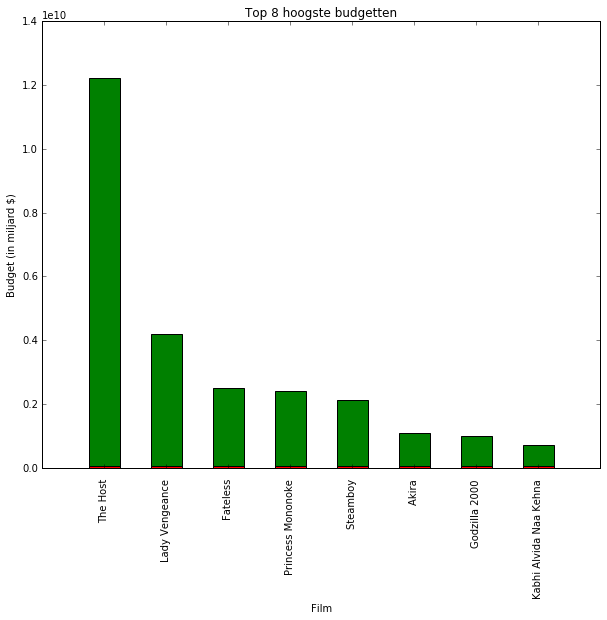

In [26]:
budget = new_rdd.filter(lambda x: '' not in x)
budget = budget.map(lambda x:(float(x[6]), x[0]))
budget = budget.sortByKey(False)

budget_values = budget.map(lambda x: x[0])
budget_names = budget.map(lambda x: x[1])

array_x = [x for x in budget_names.toLocalIterator()]
array_y = [x for x in budget_values.toLocalIterator()]

y = array_y[:8]
x = np.arange(len(y))
labels = array_x[:8]

threshold = np.mean(array_y) 

# opsplitsen boven en onder gemiddelde
above_threshold = np.maximum(y - threshold, 0)
below_threshold = np.minimum(y, threshold)


fig = plt.figure(figsize=(10, 8))
plt.title("Top 8 hoogste budgetten")
plt.bar(x, below_threshold, width=0.5, color="red", align="center")
plt.bar(x, above_threshold, width=0.5, color="green", bottom=below_threshold, align="center")
plt.xticks(x, labels, rotation=90, fontsize=10)
plt.ylabel("Budget (in miljard $)")
plt.xlabel("Film")
plt.show()